In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
# this is multiclass classification

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

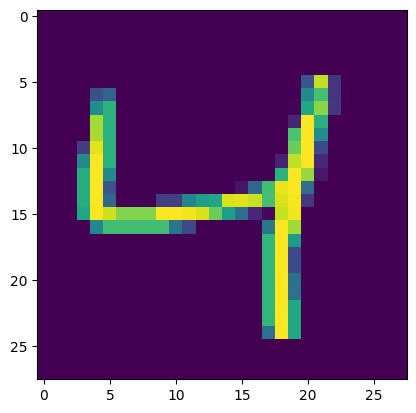

In [ ]:
# we can view the image in pixels form using the matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
# to get all the values within the range of 0 and 1 , we divide with the maximum value that is 255
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [ ]:
# here we start building the sequential model
model = Sequential()

model.add(Flatten(input_shape=(28,28)))# to convert  the 2-D array into the 1-D array
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))# for multiclassifiaction we are using the softmax activation function

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 1.0129 - accuracy: 0.7011 - val_loss: 0.5467 - val_accuracy: 0.8445
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4959 - accuracy: 0.8533 - val_loss: 0.4123 - val_accuracy: 0.8822
Epoch 3/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4025 - accuracy: 0.8840 - val_loss: 0.3497 - val_accuracy: 0.9018
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3537 - accuracy: 0.8974 - val_loss: 0.3188 - val_accuracy: 0.9097
Epoch 5/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3196 - accuracy: 0.9079 - val_loss: 0.2901 - val_accuracy: 0.9175
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2917 - accuracy: 0.9156 - val_loss: 0.2664 - val_accuracy: 0.9227
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2692 - accuracy: 0.9212 - val_loss: 0.2466 - val_accuracy:

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# to finding the maximum value
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9646

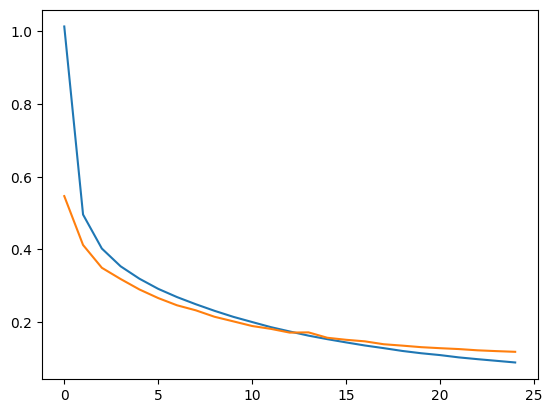

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

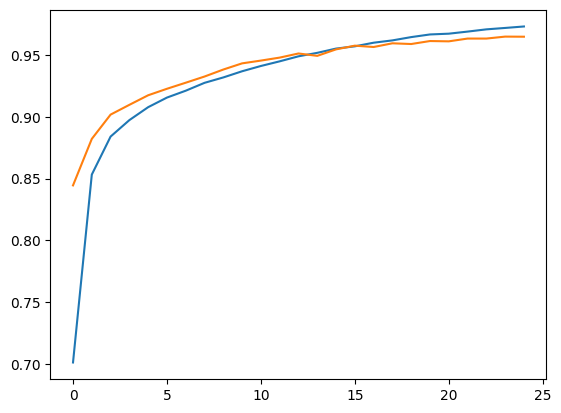

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

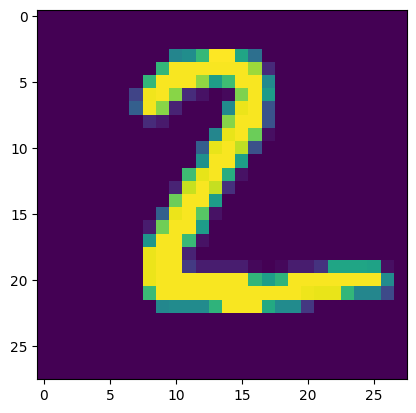

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 27ms/step


array([7])